In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_cleanliness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_cleanliness
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_cleanliness'].max()
Min = Milan['review_scores_cleanliness'].min()
Limites = [Min, Max]
Limites

[3.57, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.4300000000000002

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.09211229241685313

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.57, 5.0, 16)
intervalos

array([3.57      , 3.66533333, 3.76066667, 3.856     , 3.95133333,
       4.04666667, 4.142     , 4.23733333, 4.33266667, 4.428     ,
       4.52333333, 4.61866667, 4.714     , 4.80933333, 4.90466667,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy sucio",
    "Sucio",
    "Algo sucio",
    "Regular",
    "Aceptable",
    "Limpieza básica",
    "Bastante limpio",
    "Limpiar adecuadamente",
    "Muy limpio",
    "Impecable",
    "Bien cuidado",
    "Excelente limpieza",
    "Extremadamente limpio",
    "Limpieza sobresaliente",
    "Limpieza impecable"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_cleanliness'] = pd.cut ( x = Milan ['review_scores_cleanliness'], bins = intervalos, labels = categorias )
Milan['review_scores_cleanliness']

0            Limpieza impecable
1               Bastante limpio
2        Limpieza sobresaliente
3            Excelente limpieza
4                       Regular
                  ...          
23700    Limpieza sobresaliente
23701    Limpieza sobresaliente
23702    Limpieza sobresaliente
23703    Limpieza sobresaliente
23704    Limpieza sobresaliente
Name: review_scores_cleanliness, Length: 23705, dtype: category
Categories (15, object): ['Muy sucio' < 'Sucio' < 'Algo sucio' < 'Regular' ... 'Excelente limpieza' < 'Extremadamente limpio' < 'Limpieza sobresaliente' < 'Limpieza impecable']

In [12]:
table1 = freq_tbl(Milan['review_scores_cleanliness'])
table1

,review_scores_cleanliness,frequency,percentage,cumulative_perc
0,Limpieza impecable,8023,0.338452,0.338466
1,Limpieza sobresaliente,7113,0.300063,0.638542
2,Extremadamente limpio,2464,0.103944,0.742491
3,Excelente limpieza,1756,0.074077,0.816571
4,Impecable,1054,0.044463,0.861036
5,Bien cuidado,947,0.039949,0.900987
6,Aceptable,656,0.027673,0.928662
7,Limpiar adecuadamente,551,0.023244,0.951907
8,Muy limpio,399,0.016832,0.968739
9,Bastante limpio,271,0.011432,0.980172


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_cleanliness,frequency
0,Limpieza impecable,8023
1,Limpieza sobresaliente,7113
2,Extremadamente limpio,2464
3,Excelente limpieza,1756
4,Impecable,1054
5,Bien cuidado,947
6,Aceptable,656
7,Limpiar adecuadamente,551
8,Muy limpio,399
9,Bastante limpio,271


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_cleanliness')
Filtro_index

,frequency
review_scores_cleanliness,
Limpieza impecable,8023
Limpieza sobresaliente,7113
Extremadamente limpio,2464
Excelente limpieza,1756
Impecable,1054
Bien cuidado,947
Aceptable,656
Limpiar adecuadamente,551
Muy limpio,399


Text(0, 0.5, 'Frecuencia')

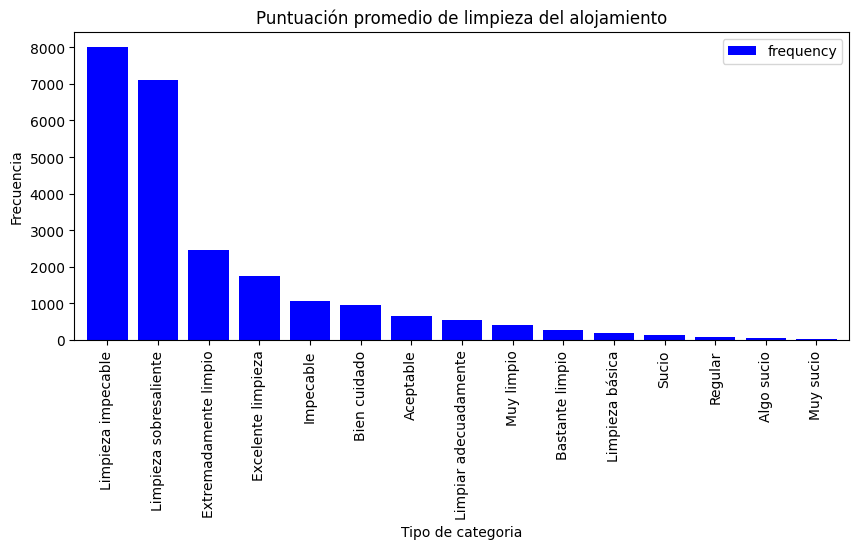

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de limpieza del alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')